<a href="https://colab.research.google.com/github/schauppi/Udemy_TensorFlow_Developer/blob/main/Exam_preparation/nlp_us_airline_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Airline Tweets text classification

In [1]:
#Download helper functions file
!wget https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/helper_functions.py

--2021-09-09 05:54:52--  https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5005 (4.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   4.89K  --.-KB/s    in 0s      

2021-09-09 05:54:52 (45.0 MB/s) - ‘helper_functions.py’ saved [5005/5005]



## Data preparation

In [2]:
#Download dataset 
!wget https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/Datasets/Tweets.csv

--2021-09-09 05:54:53--  https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/Datasets/Tweets.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/plain]
Saving to: ‘Tweets.csv’

Tweets.csv          100%[===================>]   3.26M  --.-KB/s    in 0.07s   

2021-09-09 05:54:54 (49.0 MB/s) - ‘Tweets.csv’ saved [3421431/3421431]



In [3]:
# Load in the dataset 
import pandas as pd
df = pd.read_csv("/content/Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
#How many different sentiments
df.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [5]:
#Visualize some random examples
import random
random_index = random.randint(0, len(df)-5)
for row in df[["text", "airline_sentiment"]][random_index:random_index+5].itertuples():
  _, text, sentiment = row
  print(f"Text: {text}")
  print(f"Rating: {sentiment}\n")

Text: @USAirways @AmericanAir pissing off thousands of East coast customers.  When the delay is longer than the flight,  you = fail
Rating: negative

Text: @USAirways please have your people hold flight 599 from Phoenix to San Jose.  We pulling up to the gate! Scheduled to depart at 5:40
Rating: neutral

Text: @USAirways 2 hours and counting. ..what kind of travel voucher do I get for this??
Rating: negative

Text: @USAirways we've been waiting at the gate for 2 hrs, why are we now waiting to stow the luggage?
Rating: negative

Text: @USAirways That's 1h 10m waiting to get my bag, 1h40m of flight delays, plus the 2hrs of delay I had on the way out. Never flying you again.
Rating: negative



## Remove different strings

In [6]:
# Remove Smileys, @, # and links
import re
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

for index, row in enumerate(df["text"]):
  row = re.sub(r'http\S+', '', row)
  row = re.sub(r'@', '', row)
  row = re.sub(r'#', '', row)
  row = emoji_pattern.sub(r'', row)
  df["text"][index] = row

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [7]:
#Visualize some random examples after cleaning
import random
random_index = random.randint(0, len(df)-5)
for row in df[["text", "airline_sentiment"]][random_index:random_index+5].itertuples():
  _, text, sentiment = row
  print(f"Text: {text}")
  print(f"Rating: {sentiment}\n")

Text: united gg8929 I'm sorry United isn't able to keep its word 'cuz their IT is totally inadequate but they still says it's a customer fault!
Rating: negative

Text: united How can you not know where my bags are?  You knew where they were 6 hours ago. You are killing me!  Worst service. Ever.
Rating: negative

Text: united Stop pretending you care about the welfare of my daughter. United Airlines had the opportunity to help n failed  United airlines
Rating: negative

Text: united I have received one previously on the 11th having checked. Odd as you said there was no complaint associated with my e-mail?
Rating: negative

Text: united ok, I have that, pretty sure I had it before too but will wait and see what happens....
Rating: negative



## Remove stopwords

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
df["text_stopwords"] = df["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)]))

In [10]:
#Visualize some random examples after removing stop words
import random
random_index = random.randint(0, len(df)-5)
for row in df[["text_stopwords", "text", "airline_sentiment"]][random_index:random_index+5].itertuples():
  _, text_without_stopwords, text, sentiment = row
  print(f"Text with stopwords: {text}")
  print(f"Text without stopwords: {text_without_stopwords}")
  print(f"Rating: {sentiment}\n")

Text with stopwords: AmericanAir yes yes yes,so glad to be headed home!
Text without stopwords: AmericanAir yes yes yes,so glad headed home!
Rating: positive

Text with stopwords: AmericanAir don't worry. I'll be sending a letter with what I expect from you for compensation. I fly twice a week w/you guys...for now
Text without stopwords: AmericanAir worry. I'll sending letter I expect compensation. I fly twice week w/you guys...for
Rating: negative

Text with stopwords: AmericanAir thanks!!
Text without stopwords: AmericanAir thanks!!
Rating: positive

Text with stopwords: AmericanAir thanks keep me updated just hope I make either of my connections to Killeen Tx
Text without stopwords: AmericanAir thanks keep updated hope I make either connections Killeen Tx
Rating: positive

Text with stopwords: AmericanAir I have been on hold w/customer service line for 68 minutes.  This after I was on phone with an agent for 35 min b/f call droped
Text without stopwords: AmericanAir I hold w/custome

## Split dataset

In [11]:
import numpy as np
np.random.seed(42)
perm = np.random.permutation(df.index)
m = len(df)
train_end = int(0.6 * m)
validate_end = int(0.2 * m) + train_end
train = df.iloc[perm[:train_end]]
validate = df.iloc[perm[train_end:validate_end]]
test = df.iloc[perm[validate_end:]]

In [12]:
len(train), len(validate), len(test)

(8784, 2928, 2928)

In [13]:
#Turn dataframes into numpy arrays without stopwords
train_sentences = train["text_stopwords"].to_numpy()
train_labels = train["airline_sentiment"].to_numpy()
val_sentences = validate["text_stopwords"].to_numpy()
val_labels = validate["airline_sentiment"].to_numpy()
test_sentences = test["text_stopwords"].to_numpy()
test_labels = test["airline_sentiment"].to_numpy()
train_sentences.shape, val_sentences.shape, test_sentences.shape

((8784,), (2928,), (2928,))

In [14]:
#Turn dataframes into numpy arrays with stopwords
train_sentences_with_stopwords = train["text"].to_numpy()
val_sentences_with_stopwords = validate["text"].to_numpy()
test_sentences_with_stopwords = test["text"].to_numpy()
train_sentences_with_stopwords.shape, val_sentences_with_stopwords.shape, test_sentences_with_stopwords.shape

((8784,), (2928,), (2928,))

## One-hot encode labels

In [15]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_labels.reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.fit_transform(test_labels.reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.fit_transform(val_labels.reshape(-1, 1))

In [16]:
train_labels_one_hot[:10]

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [17]:
import tensorflow as tf
#Turn data into TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

#Prefetch dataset
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [18]:
train_dataset

<PrefetchDataset shapes: ((None,), (None, 3)), types: (tf.string, tf.float64)>

In [19]:
#Turn data into TensorFlow Datasets
train_dataset_with_stopwords = tf.data.Dataset.from_tensor_slices((train_sentences_with_stopwords, train_labels_one_hot))
val_dataset_with_stopwords = tf.data.Dataset.from_tensor_slices((val_sentences_with_stopwords, val_labels_one_hot))
test_dataset_with_stopwords = tf.data.Dataset.from_tensor_slices((test_sentences_with_stopwords, test_labels_one_hot))

#Prefetch dataset
train_dataset_with_stopwords = train_dataset_with_stopwords.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset_with_stopwords = val_dataset_with_stopwords.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset_with_stopwords = test_dataset_with_stopwords.batch(32).prefetch(tf.data.AUTOTUNE)

In [20]:
train_dataset_with_stopwords

<PrefetchDataset shapes: ((None,), (None, 3)), types: (tf.string, tf.float64)>

## Create Text Vectorization layers

In [21]:
#Find average number of words in training sentences
sent_len = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_len)
avg_sent_len

11.504895264116575

(array([ 688., 1704., 2360., 2927., 1021.,   81.,    3.]),
 array([ 1.,  5.,  9., 13., 17., 21., 25., 29.]),
 <a list of 7 Patch objects>)

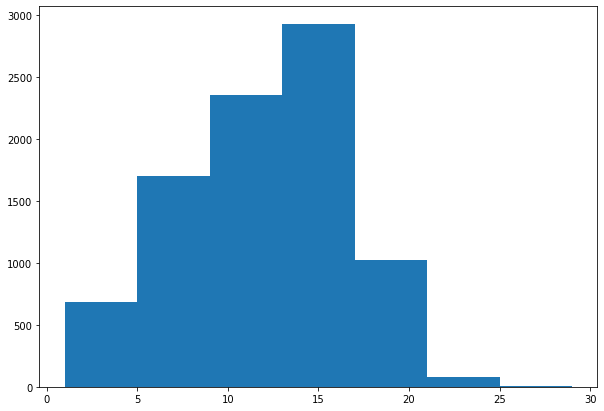

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.hist(sent_len, bins=7)

In [23]:
# How long of a sentence covers 95% of the lengths?
output_seq_len = int(np.percentile(sent_len, 95))
output_seq_len

18

In [24]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_vocab_length = 5000
max_length = output_seq_len

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [25]:
#Fit vectorizer to train sentences
text_vectorizer.adapt(train_sentences)

## Create Embedding layer

In [26]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=32,
                             embeddings_initializer="uniform",
                             input_length=max_length)

## Modelling experiments

In [27]:
from helper_functions import plot_training_curve

### Model 1: Dense

In [28]:
# Build the model 
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

In [29]:
# Compile the model 
model_1.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [30]:
%%time
history_model_1 = model_1.fit(train_dataset,
                              epochs=10,
                              verbose=1,
                              validation_data=val_dataset)

Epoch 1/10
275/275 [==============================] - 5s 9ms/step - loss: 0.9171 - accuracy: 0.6239 - val_loss: 0.8221 - val_accuracy: 0.6069
Epoch 2/10
275/275 [==============================] - 2s 8ms/step - loss: 0.7083 - accuracy: 0.6828 - val_loss: 0.7165 - val_accuracy: 0.6814
Epoch 3/10
275/275 [==============================] - 2s 8ms/step - loss: 0.6034 - accuracy: 0.7658 - val_loss: 0.6492 - val_accuracy: 0.7404
Epoch 4/10
275/275 [==============================] - 2s 8ms/step - loss: 0.5218 - accuracy: 0.8118 - val_loss: 0.6031 - val_accuracy: 0.7575
Epoch 5/10
275/275 [==============================] - 2s 8ms/step - loss: 0.4581 - accuracy: 0.8370 - val_loss: 0.5757 - val_accuracy: 0.7637
Epoch 6/10
275/275 [==============================] - 2s 8ms/step - loss: 0.4095 - accuracy: 0.8564 - val_loss: 0.5619 - val_accuracy: 0.7684
Epoch 7/10
275/275 [==============================] - 2s 8ms/step - loss: 0.3717 - accuracy: 0.8690 - val_loss: 0.5567 - val_accuracy: 0.7712
Epoch 

In [31]:
#Evaluate
model_1.evaluate(test_dataset)

92/92 [==============================] - 0s 4ms/step - loss: 0.5513 - accuracy: 0.7865


[0.5512521266937256, 0.7865437269210815]

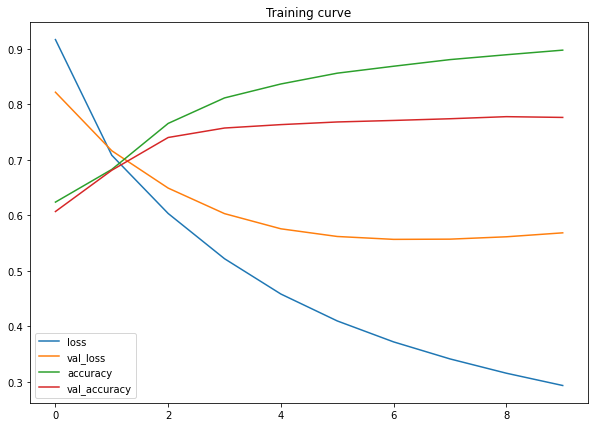

In [32]:
#Plot training curves
plot_training_curve(history_model_1)

### Model 2: Conv1D

In [33]:
# Build the model 
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=8, kernel_size=2, padding="same", activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs)

In [34]:
# Compile the model 
model_2.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [35]:
%%time
history_model_2 = model_2.fit(train_dataset,
                              epochs=500,
                              verbose=1,
                              validation_data=val_dataset,
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1)])

Epoch 1/500
275/275 [==============================] - 30s 10ms/step - loss: 1.0166 - accuracy: 0.6422 - val_loss: 0.9471 - val_accuracy: 0.7042
Epoch 2/500
275/275 [==============================] - 2s 9ms/step - loss: 0.8554 - accuracy: 0.7298 - val_loss: 0.8301 - val_accuracy: 0.6947
Epoch 3/500
275/275 [==============================] - 2s 9ms/step - loss: 0.7589 - accuracy: 0.7317 - val_loss: 0.7676 - val_accuracy: 0.6974
Epoch 4/500
275/275 [==============================] - 2s 9ms/step - loss: 0.7021 - accuracy: 0.7318 - val_loss: 0.6962 - val_accuracy: 0.7012
Epoch 5/500
275/275 [==============================] - 2s 9ms/step - loss: 0.6353 - accuracy: 0.7464 - val_loss: 0.6456 - val_accuracy: 0.7237
Epoch 6/500
275/275 [==============================] - 2s 9ms/step - loss: 0.6158 - accuracy: 0.7565 - val_loss: 0.6292 - val_accuracy: 0.7268
Epoch 7/500
275/275 [==============================] - 2s 9ms/step - loss: 0.6064 - accuracy: 0.7591 - val_loss: 0.6243 - val_accuracy: 0.72

In [36]:
#Evaluate
model_2.evaluate(test_dataset)

92/92 [==============================] - 0s 4ms/step - loss: 0.5906 - accuracy: 0.7476


[0.5905648469924927, 0.7476093173027039]

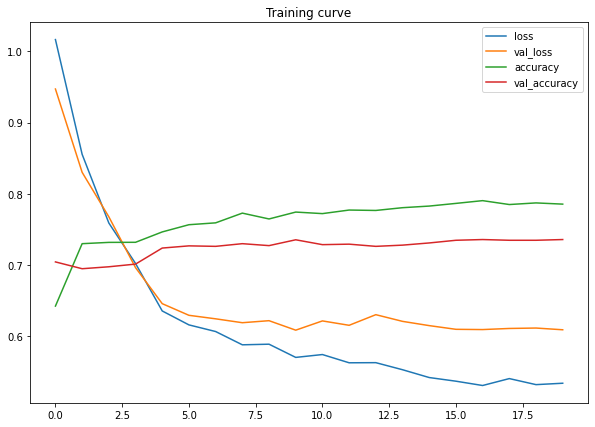

In [37]:
#Plot training curves
plot_training_curve(history_model_2)

### Model 3: LSTM

In [38]:
# Build the model 
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(8)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_3 = tf.keras.Model(inputs, outputs)

In [39]:
# Compile the model 
model_3.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [40]:
%%time
history_model_3 = model_3.fit(train_dataset,
                              epochs=500,
                              verbose=1,
                              validation_data=val_dataset,
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1)])

Epoch 1/500
275/275 [==============================] - 7s 14ms/step - loss: 0.6737 - accuracy: 0.7058 - val_loss: 0.6270 - val_accuracy: 0.7695
Epoch 2/500
275/275 [==============================] - 3s 12ms/step - loss: 0.3856 - accuracy: 0.8784 - val_loss: 0.6751 - val_accuracy: 0.7661
Epoch 3/500
275/275 [==============================] - 3s 12ms/step - loss: 0.3170 - accuracy: 0.9052 - val_loss: 0.7440 - val_accuracy: 0.7681
Epoch 4/500
275/275 [==============================] - 3s 12ms/step - loss: 0.2799 - accuracy: 0.9197 - val_loss: 0.8169 - val_accuracy: 0.7664
Epoch 5/500
275/275 [==============================] - 3s 12ms/step - loss: 0.2577 - accuracy: 0.9291 - val_loss: 0.8571 - val_accuracy: 0.7643
Epoch 6/500
275/275 [==============================] - 3s 12ms/step - loss: 0.2346 - accuracy: 0.9373 - val_loss: 0.9074 - val_accuracy: 0.7599

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 7/500
275/275 [==============================] -

In [41]:
#Evaluate
model_3.evaluate(test_dataset)

92/92 [==============================] - 0s 5ms/step - loss: 0.6071 - accuracy: 0.7807


[0.6070634126663208, 0.7807376980781555]

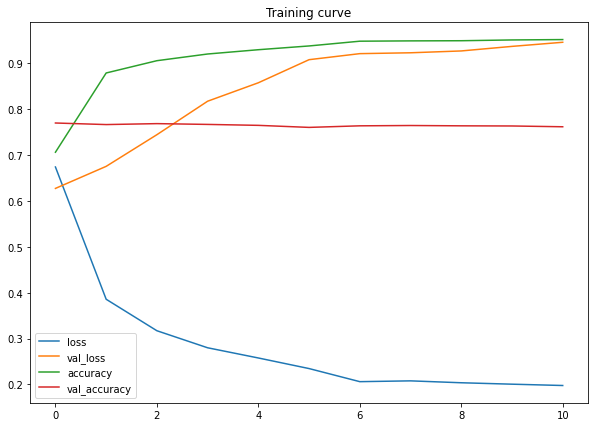

In [42]:
#Plot training curves
plot_training_curve(history_model_3)

### Model 4: GRU

In [43]:
# Build the model 
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(8)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_4 = tf.keras.Model(inputs, outputs)

In [44]:
# Compile the model 
model_4.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [45]:
%%time
history_model_4 = model_4.fit(train_dataset,
                              epochs=500,
                              verbose=1,
                              validation_data=val_dataset,
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1)])

Epoch 1/500
275/275 [==============================] - 6s 13ms/step - loss: 0.7310 - accuracy: 0.6837 - val_loss: 0.7151 - val_accuracy: 0.6841
Epoch 2/500
275/275 [==============================] - 3s 11ms/step - loss: 0.4729 - accuracy: 0.7880 - val_loss: 0.7256 - val_accuracy: 0.7292
Epoch 3/500
275/275 [==============================] - 3s 12ms/step - loss: 0.4031 - accuracy: 0.8411 - val_loss: 0.7337 - val_accuracy: 0.7568
Epoch 4/500
275/275 [==============================] - 3s 12ms/step - loss: 0.3267 - accuracy: 0.8878 - val_loss: 0.7631 - val_accuracy: 0.7626
Epoch 5/500
275/275 [==============================] - 3s 12ms/step - loss: 0.2780 - accuracy: 0.9110 - val_loss: 0.8290 - val_accuracy: 0.7661
Epoch 6/500
275/275 [==============================] - 3s 12ms/step - loss: 0.2524 - accuracy: 0.9224 - val_loss: 0.8813 - val_accuracy: 0.7579

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 7/500
275/275 [==============================] -

In [46]:
#Evaluate
model_4.evaluate(test_dataset)

92/92 [==============================] - 1s 5ms/step - loss: 0.6840 - accuracy: 0.7090


[0.6839618682861328, 0.7090163826942444]

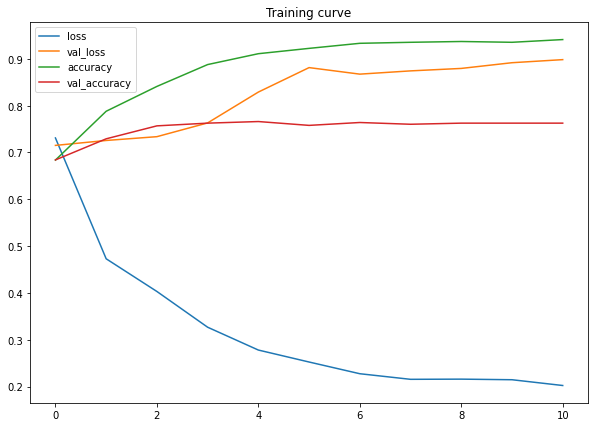

In [47]:
#Plot training curves
plot_training_curve(history_model_4)

### Model 5: Feature Extraction

In [48]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [49]:
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs)
x = layers.Dropout(0.2)(pretrained_embedding)
x = layers.Dense(4, activation="relu",kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4),
                     bias_regularizer=tf.keras.regularizers.l2(1e-4),
                     activity_regularizer=tf.keras.regularizers.l2(1e-5))(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_5 = tf.keras.Model(inputs, outputs)

In [50]:
# Compile the model 
model_5.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [51]:
%%time
history_model_5 = model_5.fit(train_dataset_with_stopwords,
                              epochs=500,
                              verbose=1,
                              validation_data=val_dataset_with_stopwords,
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1)])

Epoch 1/500
275/275 [==============================] - 10s 25ms/step - loss: 1.0116 - accuracy: 0.6793 - val_loss: 0.9104 - val_accuracy: 0.7326
Epoch 2/500
275/275 [==============================] - 6s 22ms/step - loss: 0.7778 - accuracy: 0.7509 - val_loss: 0.6675 - val_accuracy: 0.7435
Epoch 3/500
275/275 [==============================] - 6s 23ms/step - loss: 0.6342 - accuracy: 0.7662 - val_loss: 0.5925 - val_accuracy: 0.7708
Epoch 4/500
275/275 [==============================] - 6s 23ms/step - loss: 0.5930 - accuracy: 0.7849 - val_loss: 0.5665 - val_accuracy: 0.7804
Epoch 5/500
275/275 [==============================] - 6s 23ms/step - loss: 0.5764 - accuracy: 0.7881 - val_loss: 0.5555 - val_accuracy: 0.7835
Epoch 6/500
275/275 [==============================] - 6s 23ms/step - loss: 0.5558 - accuracy: 0.8008 - val_loss: 0.5473 - val_accuracy: 0.7848
Epoch 7/500
275/275 [==============================] - 6s 23ms/step - loss: 0.5590 - accuracy: 0.7959 - val_loss: 0.5461 - val_accuracy

In [52]:
#Evaluate
model_5.evaluate(test_dataset_with_stopwords)

92/92 [==============================] - 2s 17ms/step - loss: 0.4994 - accuracy: 0.8087


[0.49941298365592957, 0.8087431788444519]

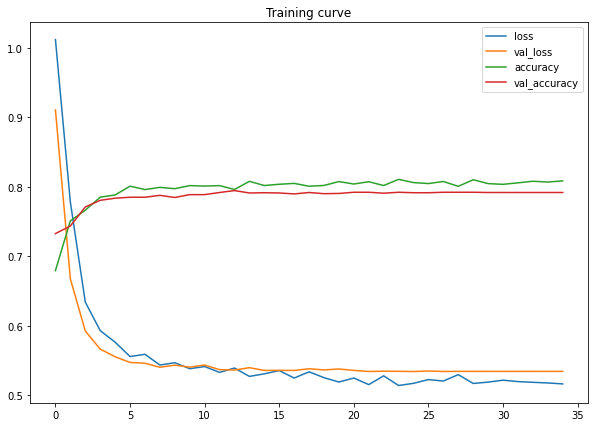

In [53]:
#Plot training curves
plot_training_curve(history_model_5)